In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1-Reading the csv file containing the data

In [77]:
#reading the dataset
dataset = pd.read_csv('train.csv')

# 2-Some Basic info about the data

In [78]:
#checking the shape of the dataset
dataset.shape

(54808, 14)

In [79]:
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [80]:
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
#Conclusion from Statistical Numerical Data (from a notebook):
#The distribution of data for feature no_of_trainings, age, length_of_service, avg_training_score looks normal (mean & median are close enough)

In [74]:
dataset.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [ ]:
#Categorical Data Conclusion (from a notebook):

#Data majority in gender is male with frequency 38496
#Data majority in department is Sales & Marketing with frequency 16840
#Data majority in education is Bachelor's with frequency 36669
#Data majority in region is region_2 with frequency 12343
#Data majority in recruitment_channel is other with frequency 30446

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# 3-Preprocessing of data

In [109]:
#checking for null values in the dataset
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [110]:
#filling the null values
dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
dataset['previous_year_rating'].fillna(2, inplace = True)

#checking for null values again:
dataset.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [61]:
#check for columns with only one value
one_uniq = dict()
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        one_uniq.update({col: dataset[col].unique().tolist()})
        
print('The name of column(s) with single value: %s' % one_uniq)

The name of column(s) with single value: {}


In [65]:
#checking for duplicate data
dataset.duplicated().sum()
#Need to be solved!

159

In [62]:
#removing unimportant variables: i.e. dropping the emp_id
dataset = dataset.drop(['employee_id'], axis = 1)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


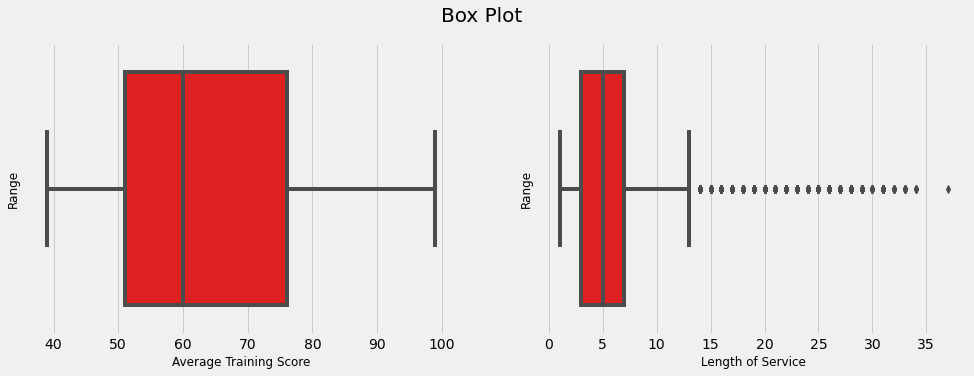

In [63]:
#detect outliers using boxplot
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(dataset['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(dataset['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [ ]:
#we need to remove the outliers in the length of service column


# 4-Data Visualization

### 1) For each feature (Uni-Variate)

e:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


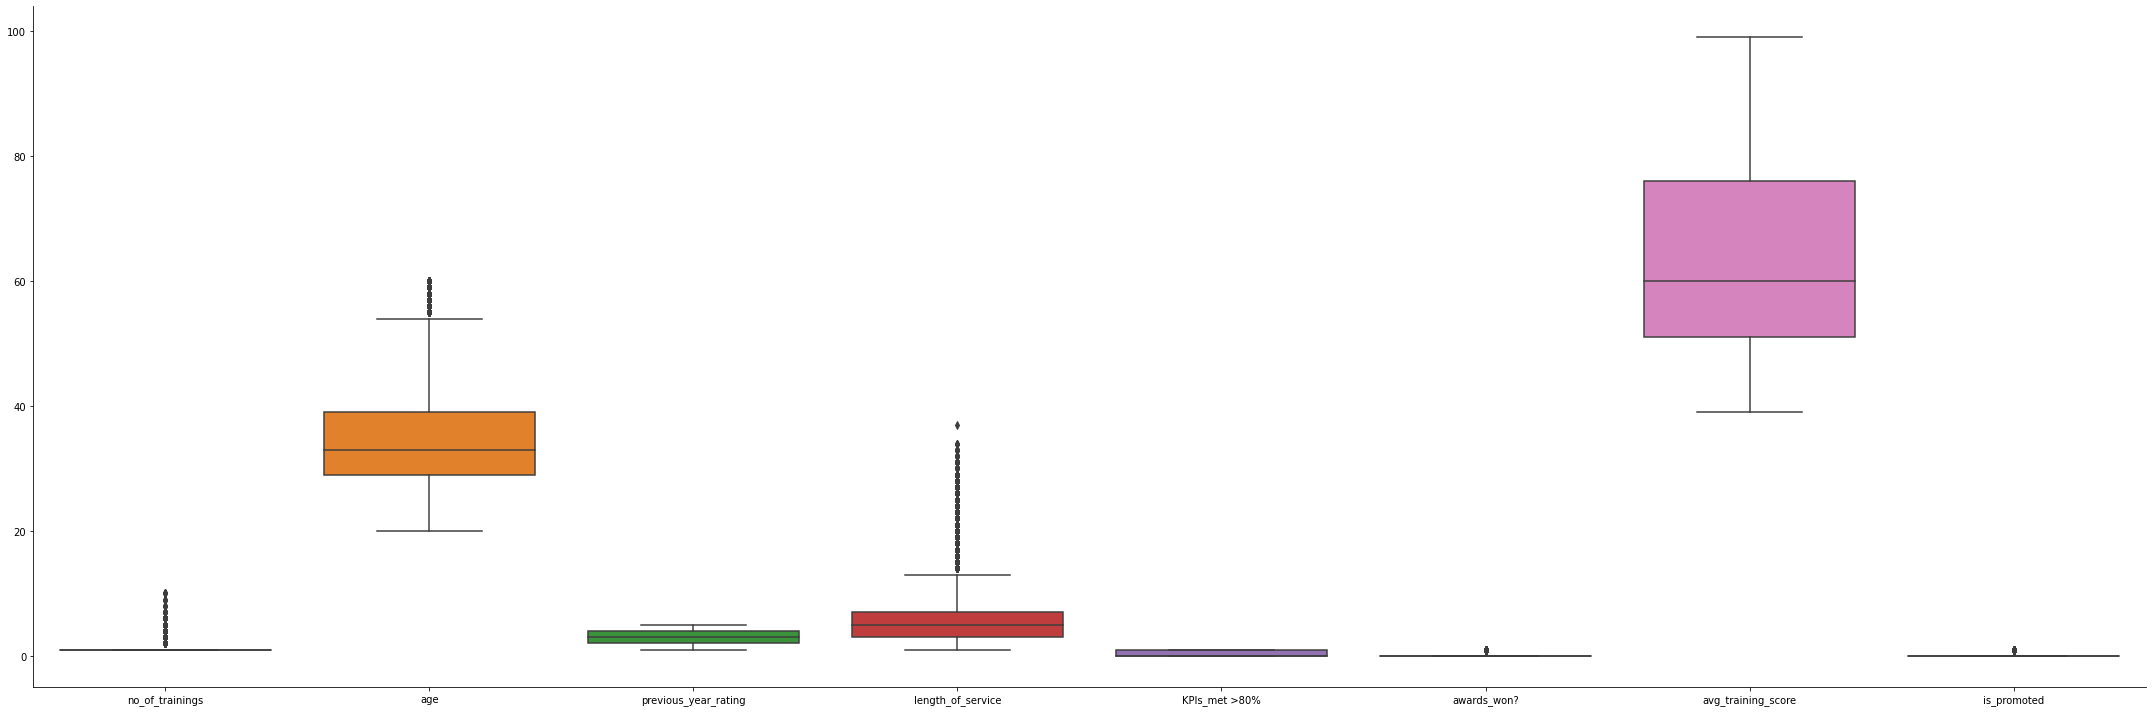

In [47]:
#first we try the boxplot
###################UNSUCCESSFUL TRIAL###########################3
sns.factorplot(data=dataset,kind='box',size=10,aspect=3)

In [ ]:
#features have pretty different scales 
#So, plotting a boxplot is not a good idea
#Instead what we can do is plot histograms of various continuously distributed features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BCFA0E970>,
      dtype=object)

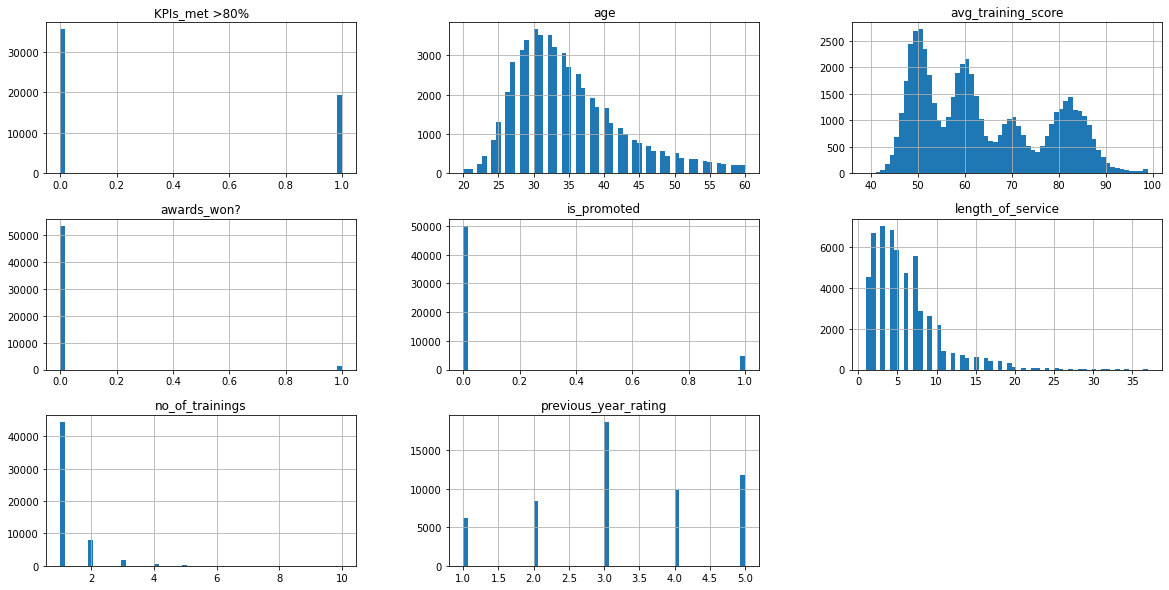

In [10]:
#plotting the histogram distribution of each numerical feature
dataset.hist(bins=60,figsize=(20,10))

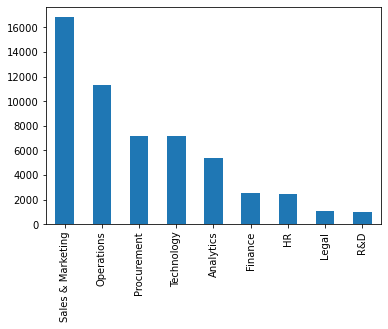

In [11]:
#plotting a bar plot for the categorical variable department
dataset['department'].value_counts().plot(kind='bar')

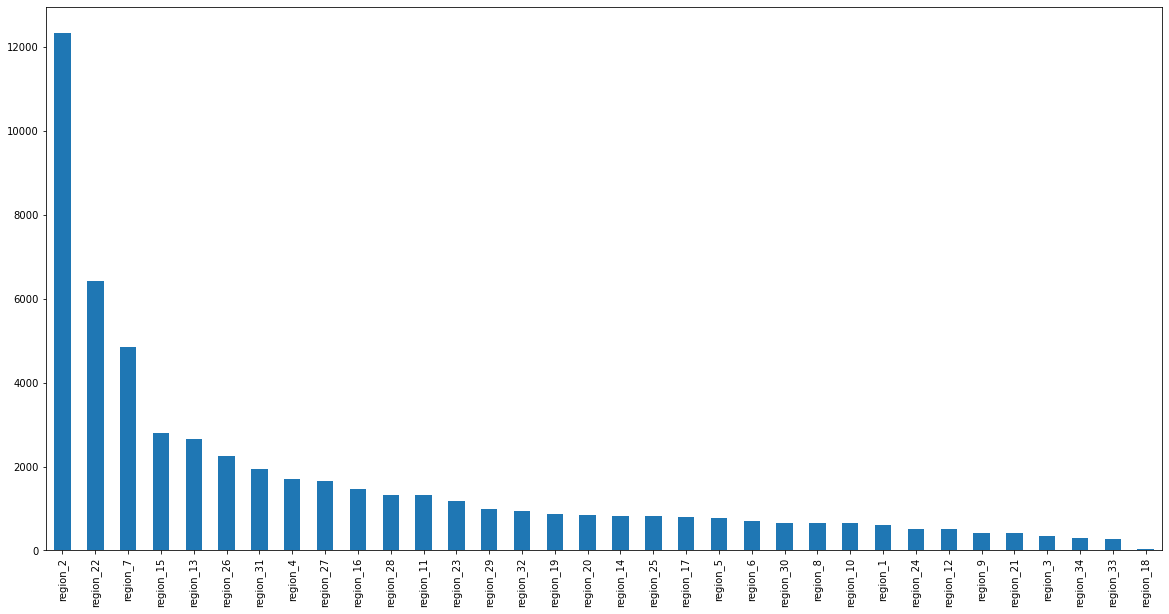

In [12]:
#plotting a bar plot for the categorical variable region
dataset['region'].value_counts().plot(kind='bar', figsize=(20,10))

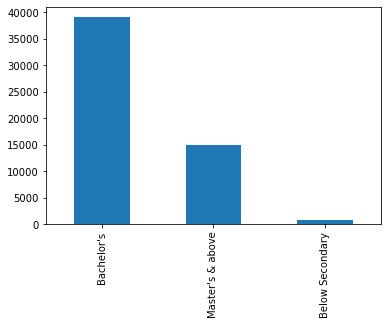

In [13]:
#plotting a bar plot for the categorical variable education
dataset['education'].value_counts().plot(kind='bar')

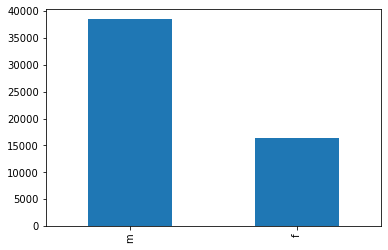

In [14]:
#plotting a bar plot for the categorical variable gender
dataset['gender'].value_counts().plot(kind='bar')

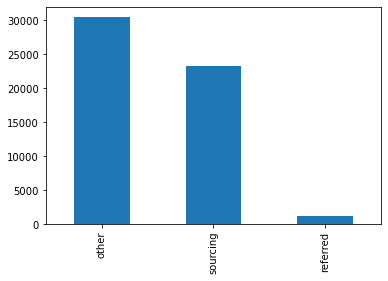

In [15]:
#plotting a bar plot for the categorical variable recruitment_channel
dataset['recruitment_channel'].value_counts().plot(kind='bar')

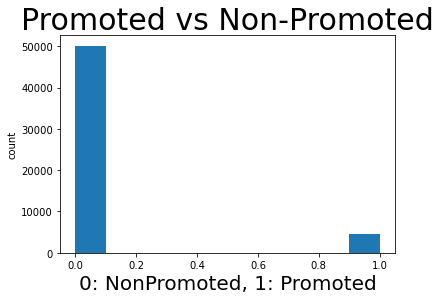

In [16]:
#plotting a scatter plot to check for imbalancing classes
plt.hist(dataset['is_promoted'])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()
#Problem of imbalanced class, need to be solved.

In [ ]:
#Some deductions from the previous univariate plots:
#1. The distribution of the is_promoted (target) variable is imbalanced. we need to find a solution for that
#2.  We will use SMOTE as another preprocessing step to balance the classes

### 2) Relations between variables (multivariate)

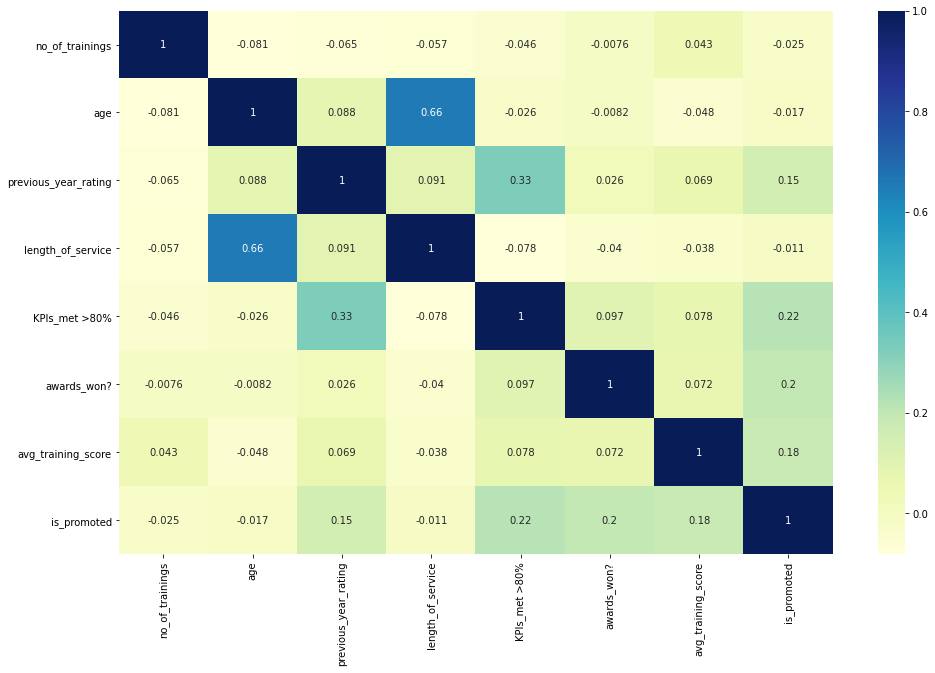

In [73]:
#draw the heat map to check for correlation values
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()
#No variables to be removed from the dataset (no high correlation between any two variables)

In [ ]:
#notes from the heat map above
#each variable has correlation = 1 with itself as expected
#1- there is high correlation between age and length_of_service as expected as older employees are more likely to have been
#working in the company for long time
#2- KPIs_met>80% is somehow related to previous year rating as expected as high rated employees are more likely to have their
#KPIs met the condition

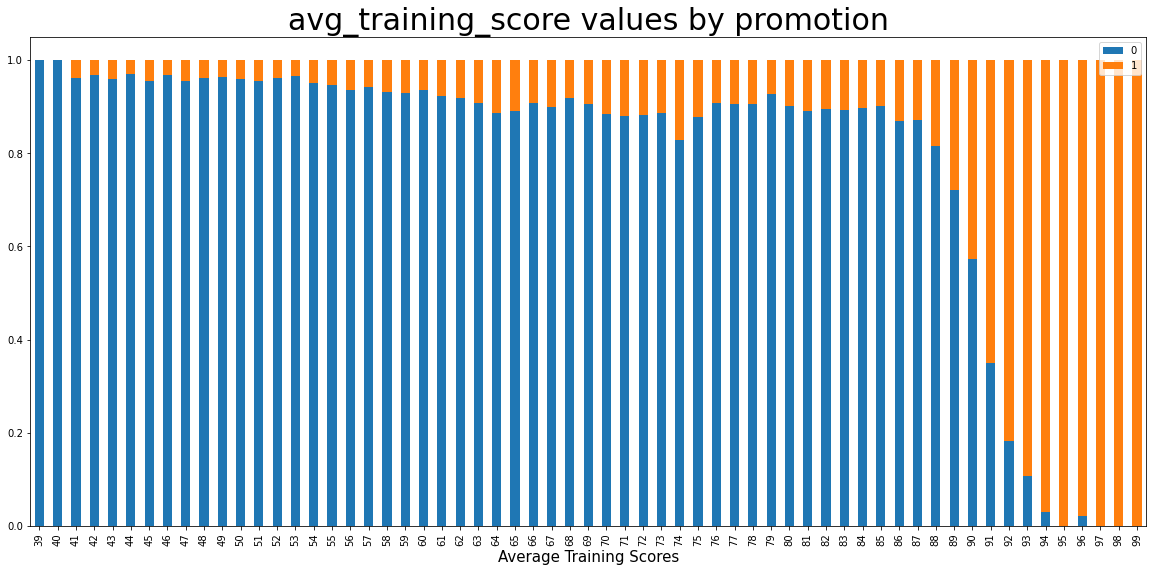

In [17]:
#plot shows the relationship between avg_training_score and is_promoted
data = pd.crosstab(dataset['avg_training_score'], dataset['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9))

plt.title('avg_training_score values by promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
#it's clear that the higher the avg_training_score, the more likely the employee is to be promoted

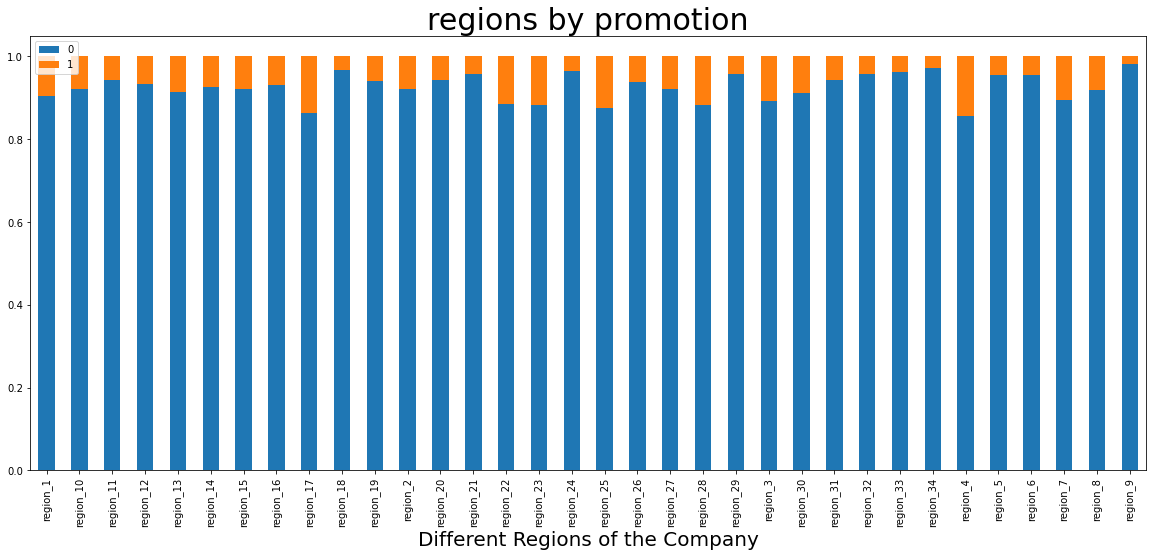

In [18]:
# checking dependency of different regions in promotion

data = pd.crosstab(dataset['region'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('regions by promotion', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

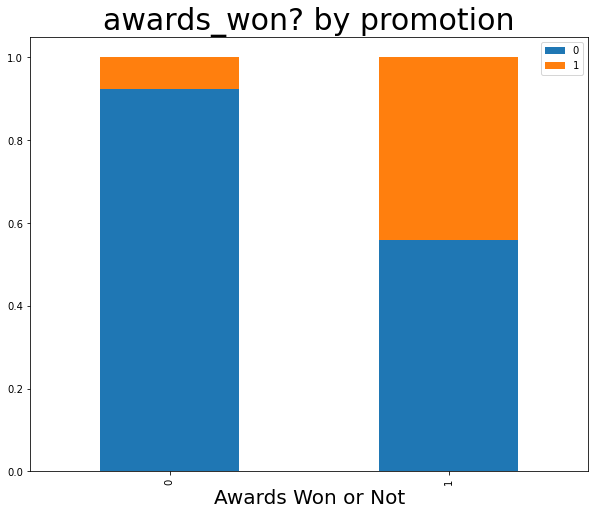

In [19]:
# dependency of awards won on promotion

data = pd.crosstab(dataset['awards_won?'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('awards_won? by promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#it's clear that the more awards the employee have, the more likely he/she is to be promoted

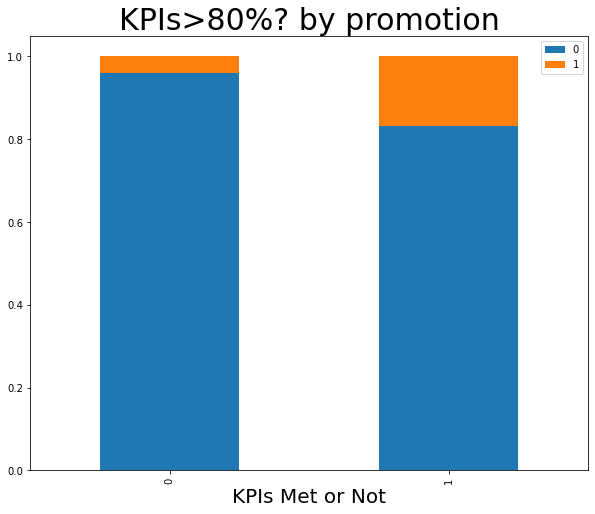

In [21]:
#dependency of KPIs with Promotion

data = pd.crosstab(dataset['KPIs_met >80%'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('KPIs>80%? by promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#it's clear that the more KPIs the employee have, the more likely he/she is to be promoted

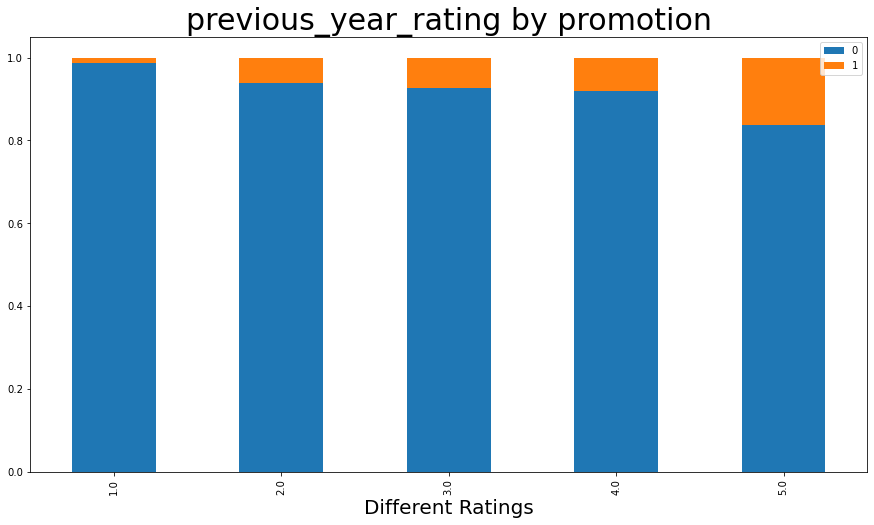

In [23]:
# checking dependency on previous years' ratings

data = pd.crosstab(dataset['previous_year_rating'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8))

plt.title('previous_year_rating by promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#it's clear that the higher the rating of the employee, the more likely he/she is to be promoted

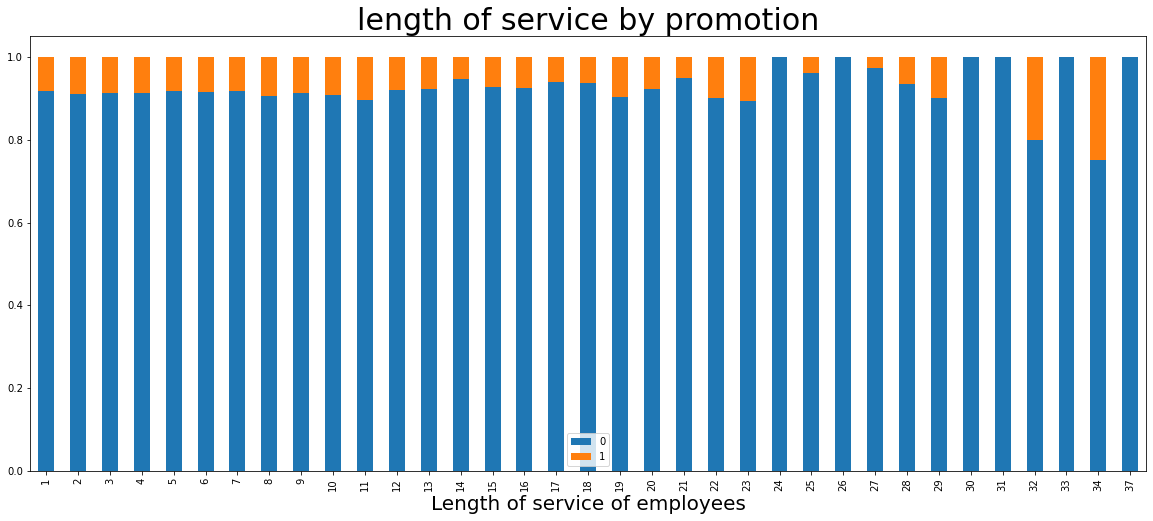

In [25]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(dataset['length_of_service'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('length of service by promotion', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#overall, i don't see a pttern in the length of service to determine the promotion of the employee


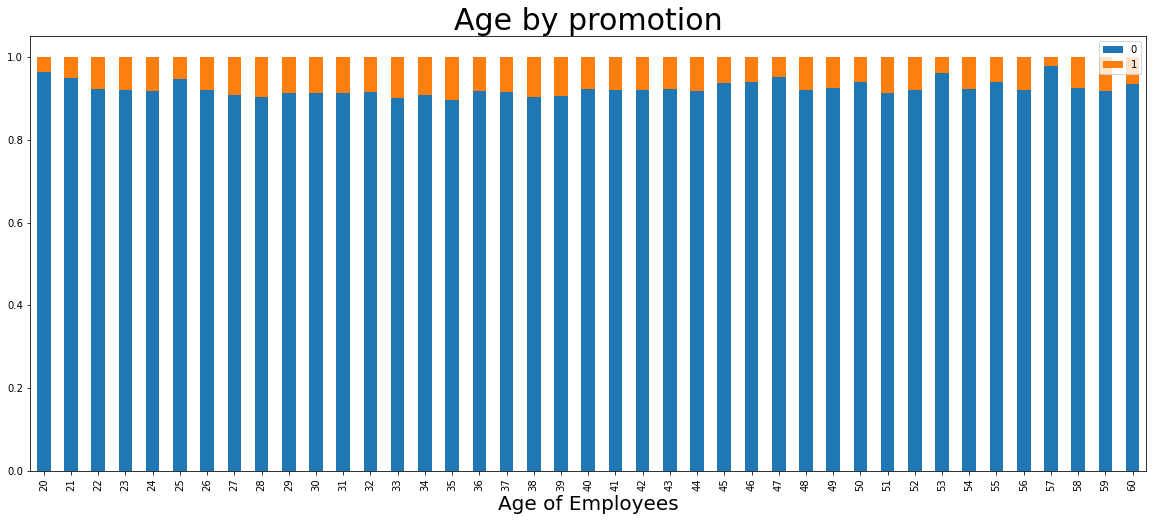

In [27]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(dataset['age'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Age by promotion', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#overall, i don't see a pttern in the age to determine the promotion of the employee
#maybe the middle aged are more likely to be promoted than the younger and the very old ones?

#From some notebook:
#This is Very Impressive that the company promotes employees of all the ages equally 
# even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company

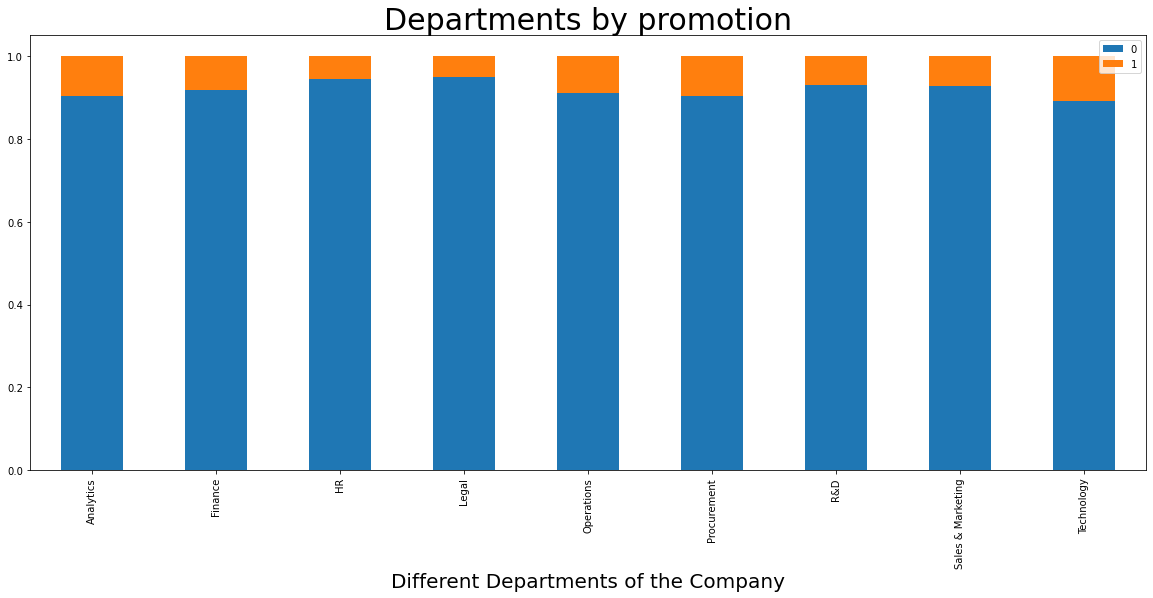

In [28]:
# checking which department got most number of promotions

data = pd.crosstab(dataset['department'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Departments by promotion', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#I don't think the department has a pattern to determine the promotion of the employee
# we can safely say that Departments have a similar effect on the promotion

#from a notebook:
#Again, Each of the departments have equal no. 
# of promotions showing an equal developement in each of the departments of the company.

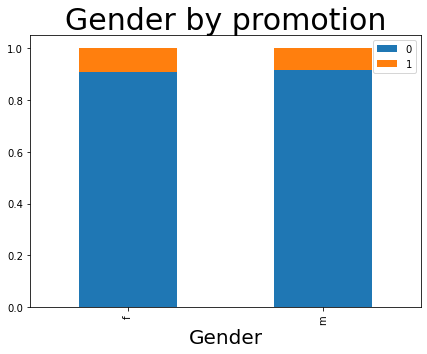

In [29]:
# checking dependency of gender over promotion

data = pd.crosstab(dataset['gender'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Gender by promotion', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#the gender doesn't affect how likely the employee is to be promoted (should be removed)
#we have already seen that the Females are in Minority, 
# but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck. That's a great Inference.

#from a notebook:
#The above plot shows that there is no partiality between males and females in terms of promotion

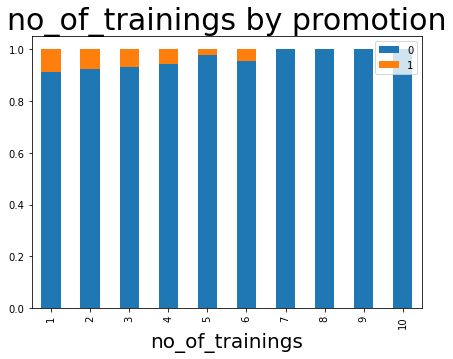

In [30]:
# checking dependency of gender over promotion

data = pd.crosstab(dataset['no_of_trainings'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('no_of_trainings by promotion', fontsize = 30)
plt.xlabel('no_of_trainings', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#هنا في حاجة غلط عشان ازاي كل ما ياخد ترينينج اكتر تقل فرصته في انه يترقى؟؟؟؟
#it's clear that the less trainings the employee have, the more likely he/she is to be promoted

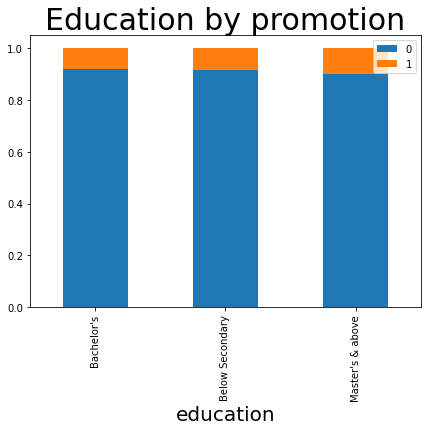

In [31]:
data = pd.crosstab(dataset['education'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Education by promotion', fontsize = 30)
plt.xlabel('education', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#it's clear that Education doesn't affect how likely the employee is to be promoted (should be removed)

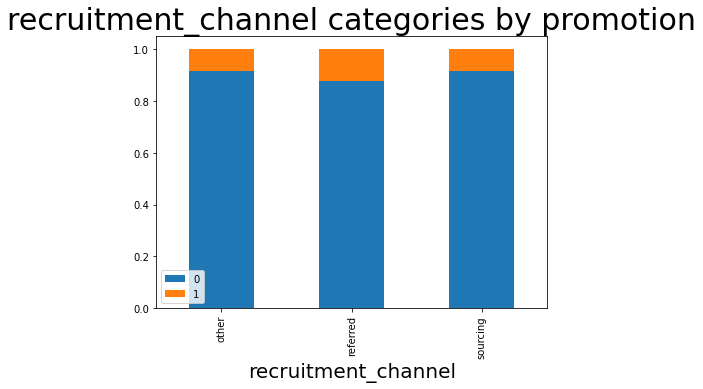

In [33]:
data = pd.crosstab(dataset['recruitment_channel'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('recruitment_channel categories by promotion', fontsize = 30)
plt.xlabel('recruitment_channel', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#it's clear that the employees that have been reffered are more likely to be promoted

### 3) Association rule mining

In [111]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [112]:
dataset_association = dataset.copy()

In [113]:
dataset_association = dataset_association.drop(['employee_id'], axis = 1)
dataset_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [146]:
dataset_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   department_Analytics            54808 non-null  uint8
 1   department_Finance              54808 non-null  uint8
 2   department_HR                   54808 non-null  uint8
 3   department_Legal                54808 non-null  uint8
 4   department_Operations           54808 non-null  uint8
 5   department_Procurement          54808 non-null  uint8
 6   department_R&D                  54808 non-null  uint8
 7   department_Sales & Marketing    54808 non-null  uint8
 8   department_Technology           54808 non-null  uint8
 9   region_region_1                 54808 non-null  uint8
 10  region_region_10                54808 non-null  uint8
 11  region_region_11                54808 non-null  uint8
 12  region_region_12                54808 non-null  uint8
 13  r

In [115]:
conditions = [
    (dataset_association['no_of_trainings'] <= 3),
    (dataset_association['no_of_trainings'] > 3) & (dataset_association['no_of_trainings'] <= 6),
    (dataset_association['no_of_trainings'] > 6)
]

values = ['low', 'medium', 'high']

dataset_association['no_of_trainings'] = np.select(conditions, values)


In [116]:
conditions = [
    (dataset_association['age'] <= 30),
    (dataset_association['age'] > 30) & (dataset_association['age'] <= 50),
    (dataset_association['age'] > 50)
]

values = ['young', 'middle_age', 'old']

dataset_association['age'] = np.select(conditions, values)


In [117]:
conditions = [
    (dataset_association['previous_year_rating'] < 3),
    (dataset_association['previous_year_rating'] == 3),
    (dataset_association['previous_year_rating'] > 3)
]

values = ['below_avg', 'avg', 'above_avg']

dataset_association['previous_year_rating'] = np.select(conditions, values)


In [122]:
conditions = [
    (dataset_association['length_of_service'] <= 5),
    (dataset_association['length_of_service'] > 5) & (dataset_association['length_of_service'] <= 10),
    (dataset_association['length_of_service'] > 10) & (dataset_association['length_of_service'] <= 15),
    (dataset_association['length_of_service'] > 15)
]

values = ['short', 'medium', 'long','very_long']

dataset_association['length_of_service'] = np.select(conditions, values)

In [138]:
conditions = [
    (dataset_association['avg_training_score'] <= 50),
    (dataset_association['avg_training_score'] > 50) & (dataset_association['avg_training_score'] <= 70),
    (dataset_association['avg_training_score'] > 70) & (dataset_association['avg_training_score'] <= 100),
]

values = ['low', 'medium', 'high']

dataset_association['avg_training_score'] = np.select(conditions, values)

In [128]:
#convert KPIs_met>80% into categorical variables
dataset_association['KPIs_met >80%'] = dataset_association['KPIs_met >80%'].astype('str')
dataset_association['KPIs_met >80%'] = dataset_association['KPIs_met >80%'].replace(['0', '1'], ['no', 'yes'])

In [131]:
dataset_association['awards_won?'] = dataset_association['awards_won?'].astype('str')
dataset_association['awards_won?'] = dataset_association['awards_won?'].replace(['0', '1'], ['no', 'yes'])

In [134]:
dataset_association['is_promoted'] = dataset_association['is_promoted'].astype('str')
dataset_association['is_promoted'] = dataset_association['is_promoted'].replace(['0', '1'], ['no', 'yes'])

In [141]:
#use pd.get_dummies
dataset_association = pd.get_dummies(dataset_association)

In [145]:
#now the dataset is ready to be used for association rules (apriori)
print(dataset_association.shape)
#we have a total of 54808 rows, so we choose a min support of 0.05
#This means that only results that occurred more than (0.05*54808) times in our data will be considered
#Apriori min support

min_support = 0.005
#Max lenght of apriori n-grams
max_len = 3
frequent_items = apriori(dataset_association, use_colnames=True, min_support=min_support, max_len=2)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.head(10).sort_values(by='confidence', ascending=False)

(54808, 73)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(department_Analytics),(no_of_trainings_low),0.097650,0.987830,0.097066,0.994021,1.006267,0.000605,2.035392
4,(department_Analytics),(gender_m),0.097650,0.702379,0.088290,0.904148,1.287265,0.019703,3.105003
2,(department_Analytics),(education_Bachelor's),0.097650,0.712998,0.078729,0.806241,1.130775,0.009105,1.481229
6,(department_Analytics),(recruitment_channel_sourcing),0.097650,0.423661,0.041892,0.428999,1.012599,0.000521,1.009348
0,(department_Analytics),(region_region_22),0.097650,0.117282,0.020325,0.208146,1.774750,0.008873,1.114749
1,(region_region_22),(department_Analytics),0.117282,0.097650,0.020325,0.173304,1.774750,0.008873,1.091514
5,(gender_m),(department_Analytics),0.702379,0.097650,0.088290,0.125701,1.287265,0.019703,1.032084
3,(education_Bachelor's),(department_Analytics),0.712998,0.097650,0.078729,0.110420,1.130775,0.009105,1.014355
7,(recruitment_channel_sourcing),(department_Analytics),0.423661,0.097650,0.041892,0.098880,1.012599,0.000521,1.001365
9,(no_of_trainings_low),(department_Analytics),0.987830,0.097650,0.097066,0.098262,1.006267,0.000605,1.000679


In [147]:
dataset_association['is_promoted_no'].value_counts()
#The data is impalanced, so we need to take this into account

1    50140
0     4668
Name: is_promoted_no, dtype: int64

In [ ]:
#There are way more cases of No than Yes so we’ll also need to take that in consideration choosing our threshold since one is more common than the other.
#For No, let’s increase the threshold to 0.1 and filter the consequents column for is_promoted_no:

In [148]:
#Apriori min support
min_support = 0.5
#Max lenght of apriori n-grams
frequent_items_no = apriori(dataset_association, use_colnames=True, min_support=min_support, max_len=2)
rules_no = association_rules(frequent_items_no, metric='lift', min_threshold=1)
target = '{\'is_promoted_no\'}'
results_attrition_no = rules_no[rules_no['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_attrition_no.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(KPIs_met >80%_no),(is_promoted_no),0.648026,0.91483,0.622373,0.960413,1.049827,0.029539,2.151483
15,(awards_won?_no),(is_promoted_no),0.976828,0.91483,0.901857,0.923251,1.009205,0.008226,1.109719
3,(education_Bachelor's),(is_promoted_no),0.712998,0.91483,0.655890,0.919904,1.005546,0.003618,1.063347
5,(gender_m),(is_promoted_no),0.702379,0.91483,0.643975,0.916849,1.002206,0.001418,1.024276
6,(recruitment_channel_other),(is_promoted_no),0.555503,0.91483,0.508867,0.916048,1.001332,0.000677,1.014510


In [149]:
#Apriori min support
min_support = 0.05
#Max lenght of apriori n-grams
frequent_items_yes = apriori(dataset_association, use_colnames=True, min_support=min_support, max_len=2)
rules_yes = association_rules(frequent_items_yes, metric='lift', min_threshold=1)
target = '{\'is_promoted_yes\'}'
results_attrition_yes = rules_yes[rules_yes['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_attrition_yes.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
301,(KPIs_met >80%_yes),(is_promoted_yes),0.351974,0.08517,0.059517,0.169094,1.985374,0.029539,1.101003
235,(age_middle_age),(is_promoted_yes),0.617392,0.08517,0.053405,0.086500,1.015620,0.000821,1.001456
221,(no_of_trainings_low),(is_promoted_yes),0.987830,0.08517,0.084604,0.085647,1.005597,0.000471,1.000521


# 3- feature selection

In [ ]:
#some variables to be removed:
    #recruitment channel
    #Region
    #

# 4-Preprocessing phase 2

### Handling Categorical data

In [34]:
#split data into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(54808, 12)
(54808,)


In [35]:
#performing one hot encoding on the categorical variables
X = pd.get_dummies(X)
X.columns


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

### Handling Imbalanced class

In [36]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel())

X = pd.DataFrame(X)
y = pd.DataFrame(y)

to_be_exported = pd.concat([X, y], axis=1)
to_be_exported.to_csv('train_smote2.csv', index=False)


print( X.shape)
print( y.shape)

(100280, 58)
(100280, 1)


In [37]:
y[0].value_counts()

1    50140
0    50140
Name: 0, dtype: int64

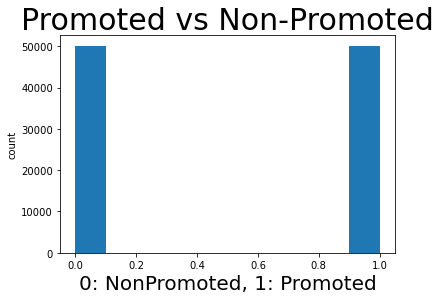

In [38]:
#plotting a scatter plot to check for imbalancing classes
plt.hist(y[0])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()
#Problem of imbalanced class, need to be solved.

### splitting the data set into train, validate and test (remember to do normalization!)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [40]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2,random_state = 0)

# 5- Training the models

In [60]:
#trying out svm model
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', degree=3, C=5, probability=True).fit(x_train, y_train)
y_pred = SVM.predict(x_test)

#evaluating 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))




E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[11869   588]
 [ 1785 10828]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12457
           1       0.95      0.86      0.90     12613

    accuracy                           0.91     25070
   macro avg       0.91      0.91      0.91     25070
weighted avg       0.91      0.91      0.91     25070

0.9053450339050658


In [26]:
#trying KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)

#evaluating 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[ 8964  3493]
 [   53 12560]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     12457
           1       0.78      1.00      0.88     12613

    accuracy                           0.86     25070
   macro avg       0.89      0.86      0.86     25070
weighted avg       0.89      0.86      0.86     25070

0.8585560430793777


In [24]:
#trying decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))


[[11563   894]
 [  585 12028]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12457
           1       0.93      0.95      0.94     12613

    accuracy                           0.94     25070
   macro avg       0.94      0.94      0.94     25070
weighted avg       0.94      0.94      0.94     25070

0.9410051854806541


In [27]:
#trying naive bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(x_train, y_train)
y_pred_nb = NB.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))

[[ 7090  5367]
 [ 1004 11609]]
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     12457
           1       0.68      0.92      0.78     12613

    accuracy                           0.75     25070
   macro avg       0.78      0.74      0.74     25070
weighted avg       0.78      0.75      0.74     25070

0.7458715596330275


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#trygin random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

<ipython-input-28-c5c43338e127>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)


[[12181   276]
 [  656 11957]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12457
           1       0.98      0.95      0.96     12613

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070

0.9628240925408855


In [29]:
#trying logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[11257  1200]
 [ 1989 10624]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     12457
           1       0.90      0.84      0.87     12613

    accuracy                           0.87     25070
   macro avg       0.87      0.87      0.87     25070
weighted avg       0.87      0.87      0.87     25070

0.8727961707219785


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Project table of contents